<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº0
#### María Victoria Poric

# Introducción teórica
En este trabajo práctico se trabajó con señales senoidales y distintas frecuencias para ver como variaban y se proyectaban gráficamente al acercarse a la frecuencia de muestreo. 

Cualquier señal del tipo periódica se puede descomponer en una señal senoidal(Fourier). En los tipos de sistemas que vemos en el curso, es decir, lineales e invariantes en el tiempo, las senoidales son auto-funciones: entran senos y salen senos, variando su amplitud y fase. Por eso se usan para probar ADC, filtros, amplificadores, medir distorsión, ruido, etcétera. 

Para lograr comprender esta práctica, es importante comprender el **Teorema de Nyquist-Shannon(Muestreo)**. Este teorema enuncia que la frecuencia de Nyquist es la mitad de la frecuencia de muestreo y que la frecuencia de muestreo debe ser mayor al doble de la frecuencia de band-width. Si se cumple esta última condición, la señal original puede recuperarse mediante interpolación sinc. De no cumplirse, se produce aliasing, esto es que las componentes de alta frecuencia se "mezclan" con las de bajas frecuencias y la señal reconstruida no es la original. Muestrear una señal es como "fotografiarla" a intervalos regulares. Si se toman fotos demasiado espaciadas(bajo muestreo), las oscilaciones rápidas se ven como oscilaciones más lentas, esto es el efecto alias. 

Con esto dicho, se podría decir que según el Criterio de Nyquist, para reconstruir una señal sin "problemas", la señal deberá estar limitada, es decir, las frecuencias deberán ser menores a la mitad de la frecuencia de muestreo. 

# Análisis y desarrollo
Para este trabajo práctico se solicitó una función que genere señales senoidales y permita parametrizar: 
la amplitud máxima de la senoidal (volts);
su valor medio (volts);
la frecuencia (Hz);
la fase (radianes);
la cantidad de muestras digitalizada por el ADC (# muestras);
la frecuencia de muestreo del ADC.
Luego, como punto bonus se debería graficar y exprimentar con 4 frecuencias: 
500 Hz, 999 Hz, 1001 Hz y 2001 Hz. Con lo cual se implementó el siguiente código:

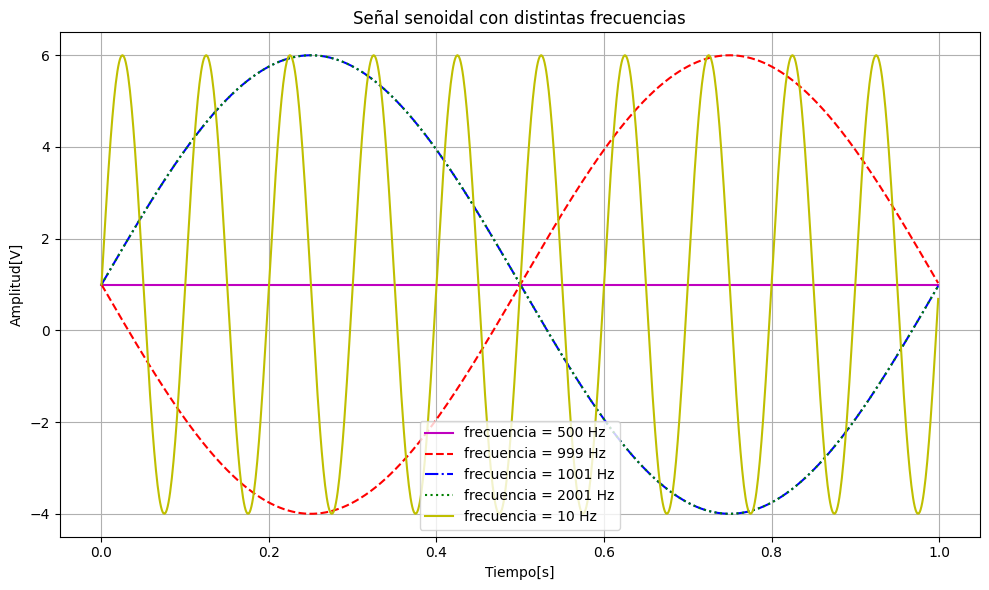

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f_senoidales(amp_max, offset, frec, fase, N, frec_ADC):
    Ts = 1 / frec_ADC #[s]
    n = np.arange(N) #índices de 0 a N-1
    tt = n * Ts                 
    xx = amp_max * np.sin(2*np.pi*frec*tt + fase) + offset
    
    return tt, xx

amp_max = 5 #Amplitud [V]
offset = 1 #Valor medio [V]
frec = [500, 999, 1001, 2001, 10] #Frecuencia [Hz]
fase = np.pi * 2 #Fase en radianes
N = 1000 #Cant de muestras
frec_ADC = 1000 #Frecuencia de muestreo [Hz]

tipos_de_linea = ['m-', 'r--', 'b-.', 'g:', 'y']

plt.figure(figsize=(10,6))

for f, estilo in zip(frec, tipos_de_linea):
    tt, xx = f_senoidales(amp_max, offset, f, fase, N, frec_ADC)
    # recorto para que todas duren 1 segundo
    mask = tt <= 1.0
    plt.plot(tt[mask], xx[mask], estilo, label = f"frecuencia = {f} Hz")
    
    
plt.xlabel('Tiempo[s]')
plt.ylabel('Amplitud[V]')
plt.title('Señal senoidal con distintas frecuencias')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


En primer lugar, voy a proceder a explicar el código. 
Para comenzar, definí la función de señales senoidales, donde Ts es el tiempo de muestreo y tanto xx como tt son los parámetros que me devuelve la función. Luego di valores aleatorios a los parámetros de la función, 
a excepción del número de muestras y la frecuencia de muestreo, así como también utilicé los valores pedidos para las frecuencias. 
Después, definí un vector de tipos de línea ya que quería que en el gráfico se vean claramente las distintas frecuencias. 
A continuación, utilice un ciclo for para recorrer los vectores de frecuencia y de tipos de línea, aunque este no fuera necesario, me resultó de mayor 
facilidad hacerlo de esta manera. 
Luego acorte el tiempo a 1 segundo, ya que con eso era necesario para ver lo que sucede con las señales, que al ser periódicas se van a seguir repitiendo. En el mismo for se van graficando cada señal para luego tener un único gráfico 
de las 5 frecuencias.


Se puede notar en el gráfico como la frecuencia de 500 Hz se transforma en una linea recta sobre el valor de offset.
Esto se debe a que se está muestreando con una frecuencia de 1000 Hz y en este caso, 500 Hz es justo el valor
"frontera", es decir, es justo la mitad de de fs, 
\begin{equation}
r = 0.5 
\end{equation}
en este caso. Como la fase es cero pues 
\begin{equation}
sin(n\pi)=0,\quad n\in\mathbb{Z}
, 
\end{equation}
todos los valores son cero.
Luego, en el caso de la frecuencia de 999 Hz, se puede decir que se encuentra muy ligeramente debajo de la frecuencia
de muestreo(1000 Hz) y el valor de r es igual a 0,999, por ende por encima de Nyquist. El alias o podríamos llamarlo
la frecuencia con la que se graficará se calcula como 
\begin{equation}
fs - f = alias
\end{equation}
, en este caso ese resultado da 1 Hz. Pero su particularidad
como se observa en el gráfico es que es un seno invertido, que equivale a un desfase de \begin{equation}
\pi \end{equation} radianes, esto se obtiene
de reemplazar en la ecuación de la función senoidal. 
Después en el caso de la frecuencia de 1001 Hz, la razón es mayor a 1, es 1.001, con lo cual se reduce esa frecuencia
diviendola por la frecuencia de muestreo y se queda con el valor del resto, en este caso 1 Hz. Entonces gráficamente
se verá como una señal de 1 Hz pero esta vez sin inversión. 
Lo que es más, con la frecuencia de 2001 Hz se procede de la misma manera que con la señal de 1001 Hz y nuevamente
el resto es 1, por ende gráficamente se observa de la misma forma que esta última señal. Con esto dicho, se demuestra
que los múltiplos de fs se "cancelan", es decir que cualquier frecuencia del tipo 
\begin{equation}
n * 1000 + 1 
\end{equation}
se graficará como una
señal con frecuencia de 1 Hz.
Por último, la frecuencia de 10 Hz que se encuentra dentro del intervalo de Nyquist se observa sin ningún fenómeno de
aliasing. Cualquier frecuencia menor a 
\begin{equation}
fs / 2 
\end{equation}
se observará correctamente, pero en este caso elegí la de 10 Hz para que 
se vea claramente, ya que una frecuencia mucho mayor, es decir, superior a 100 Hz aproximadamente pero no superior a 
500 Hz en un intervalo de tiempo de 1 segundo casi que se ve como una pantalla. 

# Conclusiones

Se puede concluir que al acercarse con valores muy próximos a la frecuencia de muestreo, en este caso 1000 Hz, se produce el 
fenómeno de *aliasing*. Por un lado, las señales con frecuencias del tipo 
\begin{equation}
n * 1000 - 1 
\end{equation}
se verán de la forma de senos invertidos de 1 Hz. Por otro lado, las señales con frecuencias del tipo 
\begin{equation}
n * 1000 + 1 
\end{equation}
se verán como senos de 1 Hz.
En este caso en particular es con múltiplos de 1000, ya que la frecuncia de muestreo fue 1000 Hz. Pero de forma
general se podria decir que siendo fs la frecuencia de muestreo, n cualquier número entero y c un valor de frecuencia,
si la frecuencia asignada es 
\begin{equation}
f = n * fs + c, 
\end{equation}
gráficamente se observará una señal senoidal de frecuencia c, si la
frecuencia asignada es 
\begin{equation}
f = n * fs - c, 
\end{equation}
se verá una señal senoidal de frecuencia c pero invertida. Y para el caso particular donde 
\begin{equation}
f = fs / 2, 
\end{equation}
la señal valdrá cero, es decir se verá como una línea recta. Por último, mientras que la frecuencia esté en el intervalo de Nyquist, es decir, 
\begin{equation}
\text{Intervalo de Nyquist} = [0, fs/2]
\end{equation}
la señal no sufrirá del fenómeno de aliasing(como el caso de la frecuencia de 10 Hz), de lo contrario, lo hará siguiendo las ideas mencionadas previamente. 

# Autoevalución del aprendizaje

Para finalizar este trabajo, puedo decir que entiendo un poco mejor el Teorema de Nyquist. Recurrí a Chat GPT para
que me ayude principalmente con los conceptos teóricos, ya que en primera instancia no comprendía por que se veían 
así las frecuencias. En si la parte del código en spyder no me resultó complicada, lo más complejo fue entender la
teoría de porqué sucedían las cosas en la práctica y poder explicarlo teóricamente. Traté de expresarme lo más claro
posible usando el vocabulario aprendido.